# Set up the enviroment + load the data 

In [1]:
%matplotlib notebook

# importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# importing training data
#train = pd.read_csv("we_data/train.csv")       # Shape:  (2430981, 25) 
#test = pd.read_csv("we_data/test.csv")         # Shape:  (303375, 22) 
data = pd.read_csv("we_data/validation.csv")    # Shape:  (303925, 25) 

### Understand the data 

In [4]:
print('Shape: ', data.shape,'\n')
print('Columns: \n', data.columns,'\n')
print('Sample of data: \n')
data.head()

Shape:  (303925, 25) 

Columns: 
 Index(['click', 'weekday', 'hour', 'bidid', 'userid', 'useragent', 'IP',
       'region', 'city', 'adexchange', 'domain', 'url', 'urlid', 'slotid',
       'slotwidth', 'slotheight', 'slotvisibility', 'slotformat', 'slotprice',
       'creative', 'bidprice', 'payprice', 'keypage', 'advertiser', 'usertag'],
      dtype='object') 

Sample of data: 



,click,weekday,hour,bidid,userid,useragent,IP,region,city,adexchange,...,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
0,0,4,20,bbcb813b6166538503d8b33a5602d7d72f6019dc,663169f66491c98c69f1f94a5c48fa34aa9fe06f,windows_ie,211.144.203.*,79,79,1.0,...,600,2,1,0,cb7c76e7784031272e37af8e7e9b062c,300,23,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10111"
1,0,1,21,5a07316c49477cb5d9b4d5aa39c27d6c3be7f92d,a23f0cfab6592c137f796e68fa752fceba08bb1b,windows_chrome,58.247.250.*,79,79,1.0,...,90,0,1,0,c938195f9e404b4f38c7e71bf50263e5,238,75,a3becb967c015e9acb5e72f22b100ef8,3476,"10075,10057,10024,10052,10083,10063,10006,10110"
2,0,4,8,f6ece71dae81d6b16bfb24ad6dd5611472d4c673,5105a013ea54a9706146033e6a138d5234a3803e,windows_ie,117.12.111.*,2,2,2.0,...,250,2,0,5,911b2d84826786018761e8c0b0a3a60c,238,65,d29e59bf0f7f8243858b8183f14d4412,3358,"13866,10024,10059,10063,13776,10083,10006,10111"
3,0,5,15,b4d5c57c9b38ff5a12954fa01e11931b4e6bfbbb,577e9a768ce17e73c61ba7022db927f9ee761830,windows_chrome,61.187.224.*,201,205,2.0,...,280,2,0,5,dc0998c10f8f0b623b5d949e8272e4c7,238,6,d29e59bf0f7f8243858b8183f14d4412,3358,"13866,10057,10006,10063,10110"
4,0,1,18,0899bf144249458ea9c89188473694bf44c7ca15,e4bf79c562745d671b19f2edf7fda89c2e25987f,windows_chrome,117.41.145.*,134,135,2.0,...,200,1,0,5,23485fcd23122d755d38f8c89d46ca56,249,5,7e0e909ea89f707bc20f9585c9072081,3476,"10006,10063,13776,10110"


### Create global variables 

In [1]:
# variables
limited_budget = 6250*1000


min_bid = min(data['bidprice'])
max_bid = max(data['bidprice'])
print(min_bid, max_bid)


min_pay = min(data['payprice'])
max_pay = max(data['payprice'])
print(min_pay, max_pay)


# handy function
def binary_search(arr, val):
    # returns index
    low, high = 0, len(arr) - 1
    
    while low < high:
        
        mid = int((low+high)/2)
        
        if arr[mid] < val:
            low = mid + 1
        else:
            high = mid
    
    return low

NameError: name 'data' is not defined

# PROBLEM 2.1: Constant Bidding

Idea:

- for loop: running over the constant bidding value
    - find and store the total number of clicks for each constant bidding value
    
- plot the data to find the best constant value

In [11]:
def constant_bidding(dat):
    
    cnst = list(range(min_pay, max_pay + 2, 1))    
    results = []

    for bid in cnst:

        budget = np.cumsum(dat.payprice*(dat.payprice <= bid))
        fin = binary_search(budget, limited_budget)
        #print(budget[fin], budget[fin], budget[fin])

        n_clk = np.sum((dat.click*(dat.payprice <= bid))[:fin]) 
        n_im = np.sum((dat.payprice <= bid)[:fin])
        cost = budget[fin]
        
        # labels = ['bid', 'clicks', 'imps_won', 'total_spend']
        results.append( [bid, n_clk, n_im, cost] )
    
    return results

###  Run experiments to do statistical averages

In [ ]:
# do statistical averages:
n = 5

exp = []

for i in range(n):
    print(i)
    
    data_rand = data.sample(frac=1).reset_index(drop=True)
    exp.append(constant_bidding(data_rand))

exp = np.array(exp)
print(exp.shape)

In [ ]:
# plot the results


cnst = exp[0,:,0]

clk_exp = exp[:,:,1]
clk = np.mean(clk_exp, axis = 0)
clk_error = np.sqrt(np.std(clk_exp, axis = 0))
#clk_error = np.std(clk_exp, axis = 0)

imps_exp = exp[:,:,2]
imps = np.mean(imps_exp, axis = 0)
imps_error = np.sqrt(np.std(imps_exp, axis = 0))

cost_exp = exp[:,:,3]
cost = np.mean(cost_exp, axis = 0)
cost_error = np.sqrt(np.std(cost_exp, axis = 0))


fig1 = plt.figure()
plt.errorbar(cnst, clk, yerr=clk_error, ecolor='y')
plt.title('Constant bid strategy')
plt.xlabel('Bid')
plt.ylabel("Number of clicks")

# PROBLEM 2.2: Random bidding 

In [10]:
def upper_lower(min_pay, max_pay, gap):
    for upper in range(min_pay,max_pay + 2, gap):
        for lower in range(min_pay, upper + 1, gap):
            yield (lower, upper)

In [11]:
def random_bidding(dat, jump):
    
    limits = upper_lower(min_pay, max_pay, jump)    
    results = []

    n = data.shape[0]
    
    for lower, upper in limits:
        
        #print(lower, upper)
        
        bid = np.random.randint(lower, upper + 1, n)
        budget = np.cumsum(dat['payprice']*(dat['payprice'] < bid))

        end = binary_search(budget, limited_budget)

        n_clk = np.sum((dat['click']*(dat['payprice'] < bid))[:end]) 
        n_im = np.sum((dat['payprice'] < bid)[:end])
        cost = budget[end-1]
        
        # labels = ['lower', 'upper', 'clicks', 'imps_won', 'total_spend']
        results.append( (lower, upper, n_clk, n_im, cost) )
    
    return results

In [ ]:
n = 1

exp_rnd = []

for i in range(n):
    print(i)
    
    data_rand = data.sample(frac=1).reset_index(drop=True)
    exp_rnd.append(random_bidding(data_rand, 10))
    
exp_rnd = np.array(exp_rnd)

In [ ]:
# do plots

# labels = ['lower', 'upper', 'clicks', 'imps_won', 'total_spend']

lower = exp_rnd[0,:,0]
upper = exp_rnd[0,:,1]

clk_exp = exp_rnd[:,:,2]
clk_rnd = np.mean(clk_exp, axis = 0)
clk_rnd_error = np.sqrt(np.std(clk_exp, axis = 0))

imps_exp = exp_rnd[:,:,3]
imps_rnd = np.mean(imps_exp, axis = 0)
imps_rnd_error = np.sqrt(np.std(imps_exp, axis = 0))

cost_exp = exp_rnd[:,:,4]
cost_rnd = np.mean(cost_exp, axis = 0)
cost_rnd_error = np.sqrt(np.std(cost_exp, axis = 0))

In [ ]:
index = np.argmax(clk_rnd)
print(lower[index])
print(upper[index])
print(max(clk_rnd))

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

n = 100

ax.scatter(lower, upper, clk_rnd, c=clk_rnd, cmap='Reds', marker='o')
ax.set_xlabel('lower bound')
ax.set_ylabel('upper bound')
ax.set_zlabel('number of clicks')
plt.show()

# PROBLEM 2.3: Multiagent random bidding

In [12]:
def create_bids(lower, upper, n, n_agents):
    """
    returns (n_bids, n_agents) 
    """
    
    bids = []
    for _ in range(n_agents):
        bids.append(np.random.randint(lower, upper + 1, n))
    
    return np.array(bids).T 

In [13]:
from itertools import combinations
from tqdm import tqdm

def multiagent_random_bidding(dat, jump, n_agents):
    
    lims = range(min_pay, max_pay+2, jump)
    limits = [(lw, up) for (lw, up) in combinations(lims,2) if lw + up > 50 and lw != up]
    
    results = []

    n = dat.shape[0]
    
    for (lower, upper) in tqdm(limits):
        
        # print(lower, upper)
        
        bids = create_bids(lower, upper, n, n_agents)
        
        # case 1:
        # transaction 1: [1, 3, 9, 8] payprice = 7
        # player 2 pays 8
        
        # case 2:
        # transaction 2: [1, 3, 5, 8] payprice = 7
        # player 3 pays 7
        
        # case 3:        
        # transaction 3: [1, 3, 9, 8] payprice = 10
        # nobody pays
        
        # create mask:
        mask = np.zeros((n, n_agents))
        
        ind_max_bid1 = np.argmax(bids, axis=1)
        max_bid1 = np.max(bids, axis=1)

        bids[list(range(n)), ind_max_bid1] = 0
        max_bid2 = np.max(bids, axis=1)
        
        someone_wins = dat.payprice <= max_bid1
        
        mask[list(range(n)), ind_max_bid1] = someone_wins
        payprice = np.maximum(max_bid2, dat.payprice)
        
        n_clk = 0
        n_im = 0
        cost = 0
        
        for agent in range(n_agents):
            end = binary_search(np.cumsum(payprice*mask[:,agent]), limited_budget)
            n_clk_temp = np.sum((dat.click*mask[:,agent])[:end])
            if n_clk_temp > n_clk:
                n_clk = n_clk_temp
                n_im = np.sum(mask[:,agent][:end])
                cost = np.cumsum(payprice*mask[:,agent])[end]        
        
        # labels = ['lower', 'upper', 'clicks', 'imps_won', 'total_spend']
        
        results.append( [lower, upper, n_clk, n_im, cost] )
    
    return np.array(results)

### Run various experiments to make statistical analysis

In [14]:
n_experiments = 10
n_agnt = 100

exp_rnd = []

for i in range(n_experiments):    
    data_rand = data.sample(frac=1).reset_index(drop=True)
    exp_rnd.append(multiagent_random_bidding(data_rand, 20, n_agnt))
    
exp_rnd = np.array(exp_rnd)

lower = exp_rnd[0,:,0]
upper = exp_rnd[0,:,1]

clk_exp = exp_rnd[:,:,2]
clk_rnd = np.mean(clk_exp, axis = 0)
clk_rnd_error = np.sqrt(np.std(clk_exp, axis = 0))

imps_exp = exp_rnd[:,:,3]
imps_rnd = np.mean(imps_exp, axis = 0)
imps_rnd_error = np.sqrt(np.std(imps_exp, axis = 0))

cost_exp = exp_rnd[:,:,4]
cost_rnd = np.mean(cost_exp, axis = 0)
cost_rnd_error = np.sqrt(np.std(cost_exp, axis = 0))

ctr_rnd = clk_rnd / imps_rnd * 100
cpm_rnd = cost_rnd / imps_rnd  * 1000
cpc_rnd = cost_rnd / clk_rnd

100%|████████████████████████████████████████████████████████████████████████████████| 118/118 [04:50<00:00,  2.36s/it]


<IPython.core.display.Javascript object>


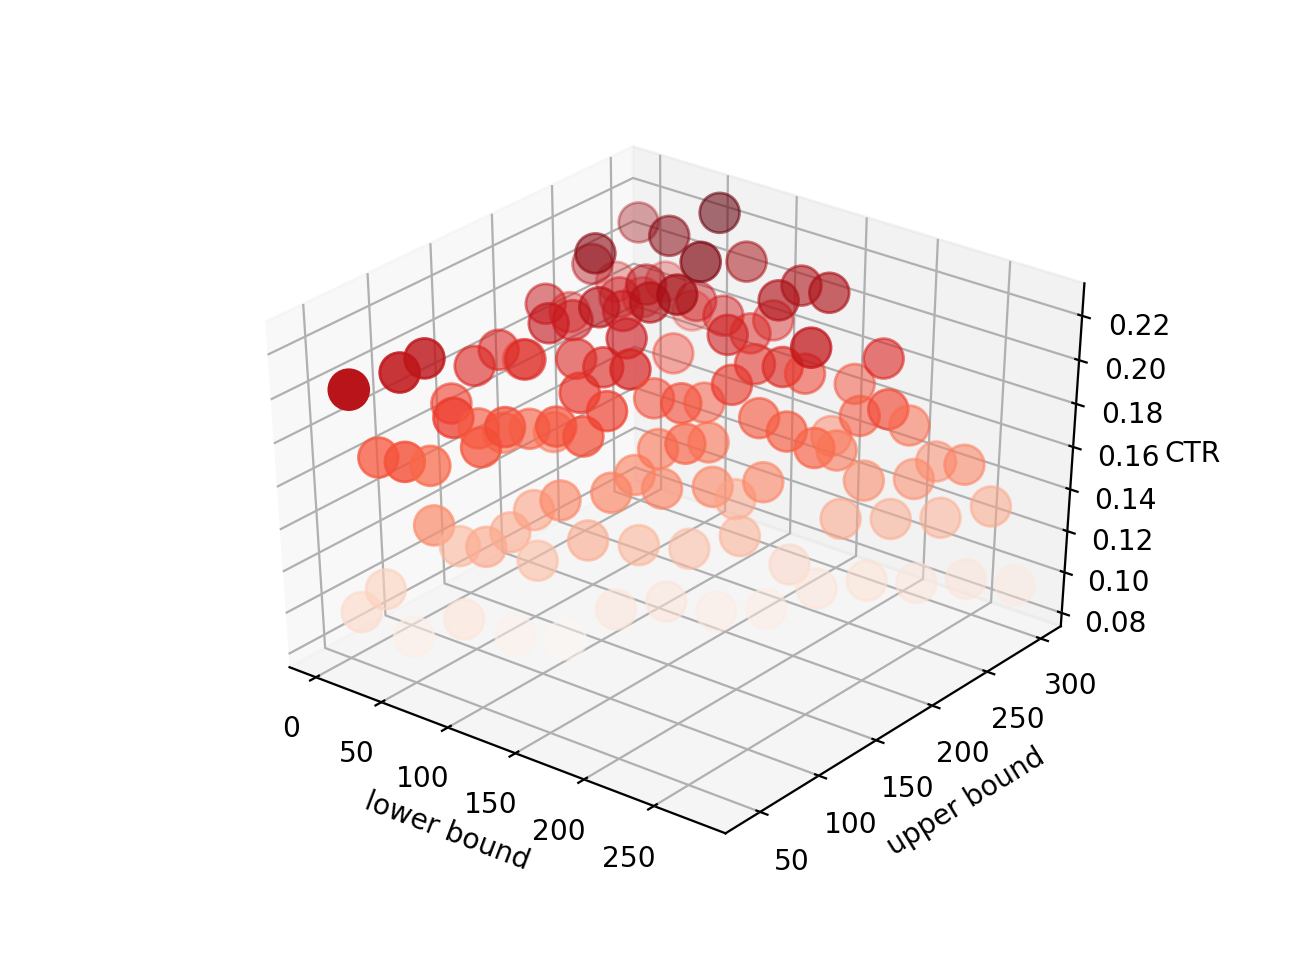

In [20]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

n = 100

ax.scatter(lower, upper, ctr_rnd, c=ctr_rnd, cmap='Reds', marker='o', s=200)
ax.set_xlabel('lower bound')
ax.set_ylabel('upper bound')
ax.set_zlabel('CTR')
plt.show()